In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
orders=pd.read_csv("Orders.csv")
customers=pd.read_csv("Customers.csv")
restaurants=pd.read_csv("Restaurants.csv")

In [ ]:
orders.info()
customers.info()
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   object 
 1   Restaurant_ID           1000 non-null   object 
 2   Order_Date              1000 non-null   object 
 3   Expected_Delivery_Time  1000 non-null   int64  
 4   Actual_Delivery_Time    1000 non-null   int64  
 5   Total_Amount            1000 non-null   float64
 6   Order_Status            1000 non-null   object 
 7   Payment_Method          1000 non-null   object 
 8   Dish_Name               1000 non-null   object 
 9   Customer_ID             1000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 78.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -

In [ ]:
orders["Order_Date"] = pd.to_datetime(orders["Order_Date"])

In [ ]:
orders

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176
...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147


In [ ]:
orders["Month"] = orders["Order_Date"].dt.strftime("%B")
orders

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month
0,O0001,R079,2023-02-27 08:00:00,26,29,731.48,Cancelled,Credit Card,Margherita Pizza,C187,February
1,O0002,R010,2023-01-09 18:00:00,35,40,461.67,Cancelled,UPI,Chicken Wings,C036,January
2,O0003,R055,2023-08-08 12:00:00,29,28,557.85,Cancelled,Cash,Egg Fried Rice,C179,August
3,O0004,R072,2023-02-26 22:00:00,35,42,209.42,Cancelled,UPI,Paneer Tikka,C186,February
4,O0005,R097,2023-06-26 12:00:00,33,23,411.99,Cancelled,Cash,Egg Fried Rice,C176,June
...,...,...,...,...,...,...,...,...,...,...,...
995,O0996,R072,2023-08-02 18:00:00,32,35,776.38,Completed,Net Banking,Pasta Alfredo,C163,August
996,O0997,R071,2023-10-10 00:00:00,39,39,840.76,Completed,UPI,Paneer Tikka,C048,October
997,O0998,R010,2023-07-31 06:00:00,45,36,232.90,Completed,Cash,Garlic Naan,C033,July
998,O0999,R100,2023-03-06 12:00:00,34,46,811.29,Completed,UPI,Fish Curry,C147,March


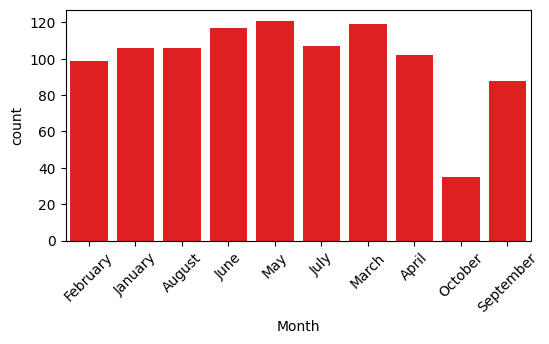

In [ ]:
plt.figure(figsize= (6,3))
sns.countplot(x = "Month", data = orders, color = "red")
plt.xticks(rotation = 45)
plt.show()

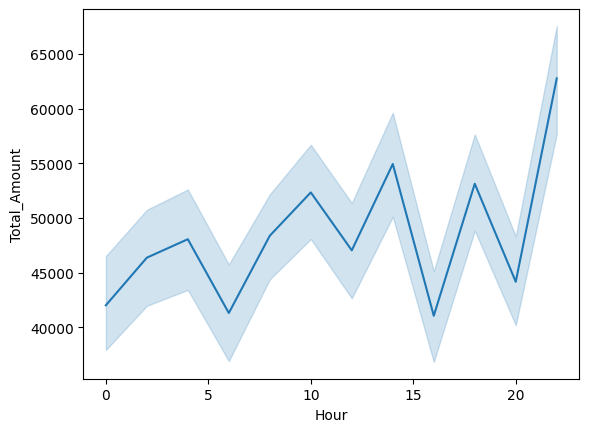

In [ ]:
orders["Hour"] = orders["Order_Date"].dt.strftime("%H")
orders["Hour"] = orders["Hour"].astype("int")
orders = orders.sort_values(by = "Hour" )
sns.lineplot(x = "Hour", y = "Total_Amount", data = orders, estimator = "sum")
plt.show()

In [ ]:
customers

,Customer_ID,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
0,C001,Delhi,18-25,3.1,Rohan Joshi
1,C002,Bangalore,36-45,4.3,Vivaan Khanna
2,C003,Delhi,26-35,4.6,Mira Rao
3,C004,Mumbai,46-55,4.3,Aarav Sharma
4,C005,Mumbai,36-45,3.2,Dev Patel
...,...,...,...,...,...
195,C196,Pune,36-45,3.6,Rohan Joshi
196,C197,Pune,46-55,4.4,Isha Reddy
197,C198,Delhi,46-55,4.3,Aanya Patel
198,C199,Bangalore,18-25,4.0,Aryan Kumar


In [ ]:
df = pd.merge(left = orders, right = customers, on = "Customer_ID", how = "inner" )
df

,Order_ID,Restaurant_ID,Order_Date,Expected_Delivery_Time,Actual_Delivery_Time,Total_Amount,Order_Status,Payment_Method,Dish_Name,Customer_ID,Month,Hour,Customer_Location,Customer_Age_Group,Customer_Rating,Customer_Name
0,O0910,R022,2023-09-07 00:00:00,38,36,337.75,Completed,Cash,Garlic Naan,C127,September,0,Mumbai,26-35,3.4,Kabir Kapoor
1,O0963,R090,2023-09-10 00:00:00,45,43,744.56,Completed,Cash,Egg Fried Rice,C039,September,0,Pune,36-45,4.7,Dev Patel
2,O0316,R038,2023-01-03 00:00:00,35,38,566.36,Completed,UPI,Paneer Tikka,C009,January,0,Chennai,26-35,4.4,Dev Patel
3,O0735,R022,2023-08-31 00:00:00,38,45,692.84,Completed,UPI,Veg Manchurian,C003,August,0,Delhi,26-35,4.6,Mira Rao
4,O0435,R081,2023-02-20 00:00:00,44,28,399.67,Completed,UPI,Garlic Naan,C131,February,0,Chennai,26-35,3.5,Kavya Gupta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O0493,R005,2023-06-24 22:00:00,45,42,887.17,Completed,Net Banking,Butter Chicken,C193,June,22,Bangalore,46-55,4.2,Aanya Patel
996,O0496,R046,2023-06-08 22:00:00,39,39,577.66,Completed,Credit Card,Fish Curry,C132,June,22,Delhi,26-35,3.7,Riya Jain
997,O0693,R004,2023-10-03 22:00:00,31,27,756.62,Completed,Net Banking,Garlic Naan,C025,October,22,Chennai,26-35,3.4,Saanvi Chopra
998,O0724,R004,2023-06-29 22:00:00,29,44,926.22,Completed,Net Banking,Garlic Naan,C075,June,22,Hyderabad,18-25,4.1,Kabir Kapoor


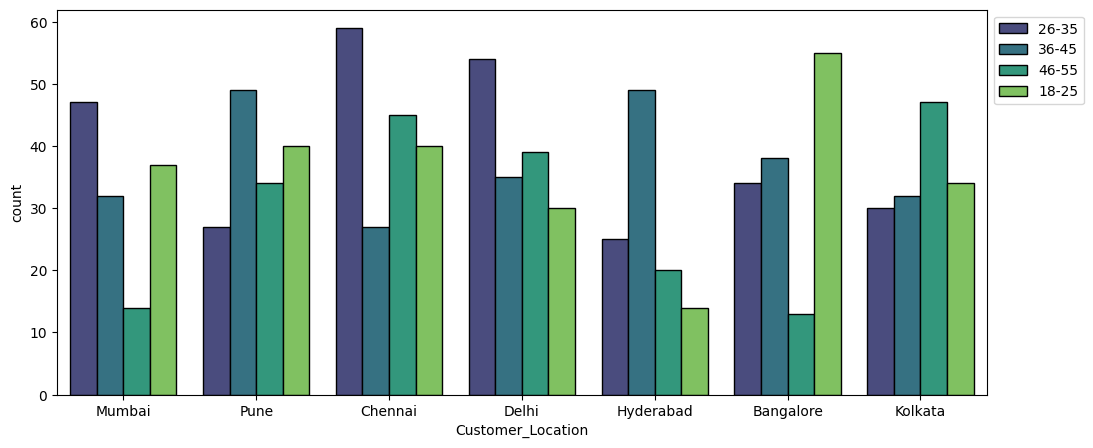

In [ ]:
plt.figure(figsize = (12,5)) #width, height
sns.countplot(x = "Customer_Location", data = df, hue = "Customer_Age_Group", palette = "viridis", edgecolor = "black")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

In [ ]:
restaurants

,Restaurant_ID,Name,Location,Cuisine_Types,Avg_Cost_for_Two,Ratings,Reviews_Count,Operational_Hours
0,R001,Brew Room,Mumbai,Continental,532,4.3,55,22:00-06:00
1,R002,Domino's Pizza,Chennai,American,939,4.1,483,11:00-22:30
2,R003,KFC,Chennai,Mexican,458,3.8,319,22:00-06:00
3,R004,Brew Room,Bangalore,Thai,280,3.0,84,09:00-23:00
4,R005,Mainland China,Delhi,American,560,4.9,401,11:00-22:30
...,...,...,...,...,...,...,...,...
95,R096,Lavaash by Saby,Mumbai,Japanese,286,4.0,77,00:00-23:59
96,R097,Mamagoto,Hyderabad,American,454,4.8,373,11:00-22:00
97,R098,Chili's,Pune,American,655,3.4,406,09:00-23:00
98,R099,Rajdhani Thali,Pune,"Indian, Chinese",847,3.7,314,11:00-22:00
